# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Incorportaed datetime to determine the date of analysis
import datetime
today = datetime.date.today()

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'There is {len(cities)} in the location.')


There is 614 in the location.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
# The total number of sets needed
total_set_num = (len(cities) // 50) + 1

# Lists for the dataframe
city = []
lat = []
lon = []
city = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
failed_counter = 0
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric&q="

# cities weather record info
print('Beginning Data Retrieval')
print('-----------------------------')

for set_counter in range(total_set_num):
    
    # try will avoid record breaking if the set doesnt have 50 processing records
    try:    
        # record counter in range 
        for record_counter in range(50):
            
            # extracting the within the list of cities
            counter = set_counter * 50 + record_counter
            
            print(f'Processing Record {record_counter + 1} of Set {set_counter + 1} | {cities[counter]}')

            try:
                
                # query url 
                query_url = url + cities[counter]
                weather_json = requests.get(query_url, time.sleep(1)).json()
                
                # Append lists of the columns
                lat.append(weather_json["coord"]["lat"])
                lon.append(weather_json["coord"]["lon"])
                max_temp.append(weather_json["main"]["temp_max"])
                humidity.append(weather_json["main"]["humidity"])
                cloudiness.append(weather_json["clouds"]["all"])
                wind_speed.append(weather_json["wind"]["speed"])
                country.append(weather_json["sys"]["country"])
                date.append(weather_json["dt"])
                city.append(cities[counter])
            
            # print 'city not found' to the failed counter 
            except KeyError:

                print('City not found. Skipping...')
                failed_counter += 1
            
            # Other errors, print unexpected error
            except:
                
                print('Unexpected Error')
    
    # loop once the IndexError was found
    except IndexError:
        
        break
        
# Print cities found and cities not found
print('-----------------------------')
print(f'There are {failed_counter} cities not found. {len(cities) - failed_counter} cities in dataframe.')
print('Data Retrieval Complete')      
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | constitucion
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | caraballeda
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | san patricio
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | noumea
Processing Record 9 of Set 1 | cacu
Processing Record 10 of Set 1 | kodinsk
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | kochki
Processing Record 14 of Set 1 | karkaralinsk
City not found. Skipping...
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | kaoma
Processing Record 18 of Set 1 | lasa
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | mahebourg
Processing Record 22 of Set 1 | mandalgovi
Processing Re

Processing Record 39 of Set 4 | beberibe
Processing Record 40 of Set 4 | bairiki
Processing Record 41 of Set 4 | bereda
Processing Record 42 of Set 4 | sibolga
Processing Record 43 of Set 4 | burgeo
Processing Record 44 of Set 4 | walvis bay
Processing Record 45 of Set 4 | parintins
Processing Record 46 of Set 4 | nanortalik
Processing Record 47 of Set 4 | port lincoln
Processing Record 48 of Set 4 | kruisfontein
Processing Record 49 of Set 4 | riyadh
Processing Record 50 of Set 4 | bengkulu
Processing Record 1 of Set 5 | vila franca do campo
Processing Record 2 of Set 5 | kenitra
Processing Record 3 of Set 5 | apricena
Processing Record 4 of Set 5 | canon city
Processing Record 5 of Set 5 | saint-joseph
Processing Record 6 of Set 5 | kiruna
Processing Record 7 of Set 5 | cabatuan
Processing Record 8 of Set 5 | caravelas
Processing Record 9 of Set 5 | sal rei
Processing Record 10 of Set 5 | klenovyy
Processing Record 11 of Set 5 | druzhba
Processing Record 12 of Set 5 | bayan
Processin

Processing Record 31 of Set 8 | murray bridge
Processing Record 32 of Set 8 | umm bab
Processing Record 33 of Set 8 | saint-ambroise
Processing Record 34 of Set 8 | vila velha
Processing Record 35 of Set 8 | rungata
City not found. Skipping...
Processing Record 36 of Set 8 | carutapera
Processing Record 37 of Set 8 | warqla
City not found. Skipping...
Processing Record 38 of Set 8 | kontagora
Processing Record 39 of Set 8 | ati
Processing Record 40 of Set 8 | cockburn town
Processing Record 41 of Set 8 | waipawa
Processing Record 42 of Set 8 | shitanjing
Processing Record 43 of Set 8 | kandalaksha
Processing Record 44 of Set 8 | arrecife
Processing Record 45 of Set 8 | kiunga
Processing Record 46 of Set 8 | okhotsk
Processing Record 47 of Set 8 | bloomingdale
Processing Record 48 of Set 8 | tautira
Processing Record 49 of Set 8 | carlisle
Processing Record 50 of Set 8 | moerai
Processing Record 1 of Set 9 | saleaula
City not found. Skipping...
Processing Record 2 of Set 9 | angoche
Pro

Processing Record 15 of Set 12 | high level
Processing Record 16 of Set 12 | jian
Processing Record 17 of Set 12 | darnah
Processing Record 18 of Set 12 | zhigansk
Processing Record 19 of Set 12 | kijang
Processing Record 20 of Set 12 | deputatskiy
Processing Record 21 of Set 12 | phangnga
Processing Record 22 of Set 12 | lokosovo
Processing Record 23 of Set 12 | botesti
Processing Record 24 of Set 12 | coihaique
Processing Record 25 of Set 12 | omachi
Processing Record 26 of Set 12 | ishigaki
Processing Record 27 of Set 12 | mehamn
Processing Record 28 of Set 12 | manggar
Processing Record 29 of Set 12 | ellisras
Processing Record 30 of Set 12 | quirinopolis
Processing Record 31 of Set 12 | soto
Processing Record 32 of Set 12 | sao paulo de olivenca
Processing Record 33 of Set 12 | oranjemund
Processing Record 34 of Set 12 | hue
Processing Record 35 of Set 12 | veracruz
Processing Record 36 of Set 12 | sao mateus
Processing Record 37 of Set 12 | lolua
City not found. Skipping...
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Generate dataframe of lists from last cell
cities_dict = {'City': city,
               'Latitude' : lat,
               'Longitude' : lon,
               'Max Temperature (°C)': max_temp,
               'Humidity (%)': humidity,
               'Cloudiness (%)': cloudiness,
               'Wind Speed (MPH)': wind_speed,
               'Country': country,
               'Date': date
              }
cities_df = pd.DataFrame(cities_dict)

# Send dataframe to a csv file
csv_path = 'output_data/cities.csv'
cities_df.to_csv(csv_path)

# Display the dataframe
cities_df

,City,Latitude,Longitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,belaya gora,68.5333,146.4167,17.80,35,20,5.88,RU,1658828651
1,yellowknife,62.4560,-114.3525,12.29,87,20,2.06,CA,1658828652
2,atuona,-9.8000,-139.0333,25.19,73,0,7.10,PF,1658828654
3,cape town,-33.9258,18.4232,22.84,41,0,0.89,ZA,1658828439
4,carnarvon,-24.8667,113.6333,19.41,52,0,6.24,AU,1658828656
...,...,...,...,...,...,...,...,...,...
561,kentau,43.5206,68.5094,40.32,11,58,5.47,KZ,1658829428
562,netrakona,24.8833,90.7167,31.30,62,62,2.53,BD,1658829429
563,boyolangu,-8.1181,111.8935,24.34,84,78,3.38,ID,1658829430
564,polunochnoye,60.8697,60.4153,21.69,35,66,2.22,RU,1658829432


In [13]:
# Display statistics on the dataframe
cities_df.describe()

,Latitude,Longitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,19.900670,15.448377,22.110035,68.584806,53.478799,3.569876,1.658829e+09
std,33.367123,88.524570,8.225750,23.503396,38.266491,2.336535,3.036445e+02
min,-54.800000,-179.166700,-7.970000,1.000000,0.000000,0.000000,1.658828e+09
25%,-7.365575,-61.722425,16.762500,53.000000,16.250000,2.030000,1.658829e+09
50%,23.250000,21.670300,23.350000,74.000000,58.000000,3.110000,1.658829e+09
75%,47.891675,87.805575,27.667500,88.000000,92.750000,4.755000,1.658829e+09
max,78.218600,179.316700,47.260000,100.000000,100.000000,14.400000,1.658829e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
# Skip any row which has a humidity higher than 100%
cleaned_cities_df = cities_df.loc[cities_df['Humidity (%)'] <= 100]
cleaned_cities_df

,City,Latitude,Longitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,belaya gora,68.5333,146.4167,17.80,35,20,5.88,RU,1658828651
1,yellowknife,62.4560,-114.3525,12.29,87,20,2.06,CA,1658828652
2,atuona,-9.8000,-139.0333,25.19,73,0,7.10,PF,1658828654
3,cape town,-33.9258,18.4232,22.84,41,0,0.89,ZA,1658828439
4,carnarvon,-24.8667,113.6333,19.41,52,0,6.24,AU,1658828656
...,...,...,...,...,...,...,...,...,...
561,kentau,43.5206,68.5094,40.32,11,58,5.47,KZ,1658829428
562,netrakona,24.8833,90.7167,31.30,62,62,2.53,BD,1658829429
563,boyolangu,-8.1181,111.8935,24.34,84,78,3.38,ID,1658829430
564,polunochnoye,60.8697,60.4153,21.69,35,66,2.22,RU,1658829432


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

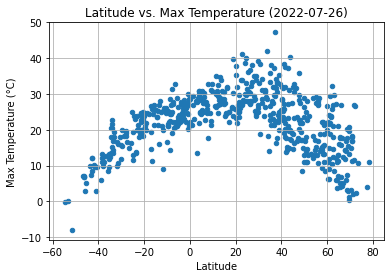

In [15]:
# Plot the scatter plot of latitude and max temperature.
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', 
                       title=f'Latitude vs. Max Temperature ({today})')
plt.grid()
plt.savefig('output_data/Latitude_MaxTemperature_Plot.png')

The plot have shown that the max temperature increases as the latitude of the place approaching the interval of -20 to 20. The higher the latitude, the lower the temperature.

## Latitude vs. Humidity Plot

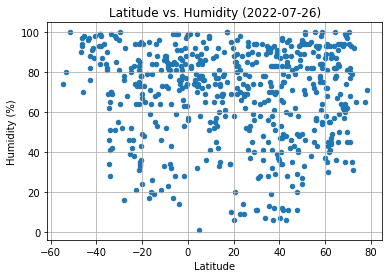

In [16]:
# Plot the scatter plot comparing latitude and humidity.
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', 
                       title=f'Latitude vs. Humidity ({today})')
plt.grid()
plt.savefig('output_data/Latitude_Humidity_Plot.png')

Most of the cities tend to have a humidity above 60%, while the humidity of those cities with latitude between 0 to 40 tends to vary more. Cities with latitude between 40 to 80 often have a humidity between 80% to 100%.

## Latitude vs. Cloudiness Plot

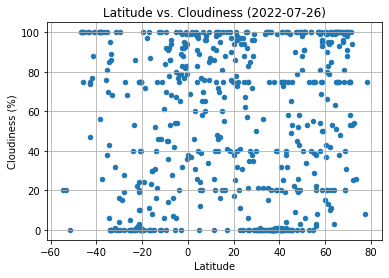

In [17]:
# Plot the scatter plot of latitude and cloudiness.
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', 
                       title=f'Latitude vs. Cloudiness ({today})')
plt.grid()
plt.savefig('output_data/Latitude_Cloudiness_Plot.png')

The cities with latitude 40 to 80 tends to have a cloudiness clustering at 80% to 100%. However, the rest of the data points seem to distributed evenly on the plot. Hence, there isn't much of a correlation between coludiness and latitude. 

## Latitude vs. Wind Speed Plot

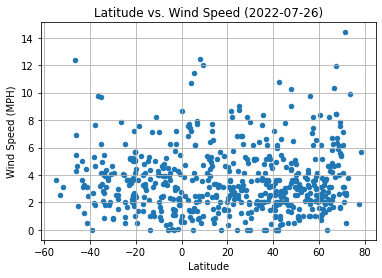

In [18]:
# Plot the scatter plot of latitude and wind speed.
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', 
                       title=f'Latitude vs. Wind Speed ({today})')
plt.grid()
plt.savefig('output_data/Latitude_WindSpeed_Plot.png')

Most of the cities has a wind speed of 0MPH to 8MPH, with some cities at a higher(positive and negative) latitude having higher wind speed.

## Linear Regression

In [19]:
# Dataframe in comparision of north and south cities latitude
north_cities_df = cleaned_cities_df.loc[cleaned_cities_df['Latitude'] >= 0]
south_cities_df = cleaned_cities_df.loc[cleaned_cities_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.37087979806381527
The linear regression model is y = -0.25x + 33.17


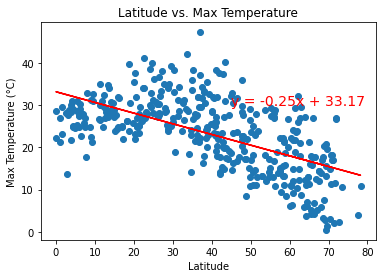

In [20]:
# Plot the linear regression of latitude and max temperature in the northern hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', title='Latitude vs. Max Temperature')

# Linear regression(Northern Hempisphere)print scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Max Temperature (°C)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Max Temperature (°C)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq, (45, 30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the northern hemisphere, the max temperature decreases while the city is away from 0 degree latitude.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.6622678933306106
The linear regression model is y = 0.41x + 27.91


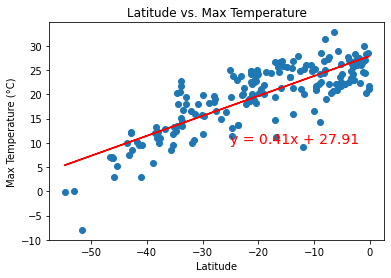

In [21]:
# Plot the linear regression of latitude and max temperature in the southern hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', title='Latitude vs. Max Temperature')

# Linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Max Temperature (°C)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Max Temperature (°C)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the southern hemisphere, the max temperature increases while the city is close to 0 degree latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.00034533579643033195
The linear regression model is y = 0.02x + 66.59


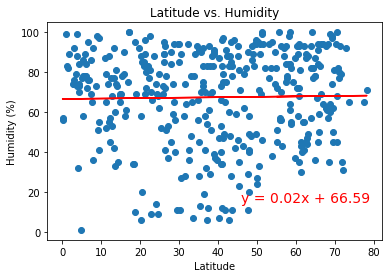

In [22]:
# Plot the linear regression of latitude and humidity of northern hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='Latitude vs. Humidity')

# Linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Humidity (%)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Humidity (%)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(46,15),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the northern hemisphere, the humidity increases while the city is away from 0 degree latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.02213095636158777
The linear regression model is y = -0.25x + 66.0


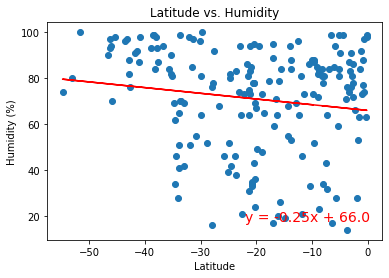

In [23]:
# Plot the linear regression of latitude and humidity in the southern hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='Latitude vs. Humidity')

# Linear regression and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Humidity (%)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Humidity (%)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,18),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the southern hemisphere, the humidity slightly increases while the city is close to 0 degree latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0026838844430223164
The linear regression model is y = 0.1x + 51.29


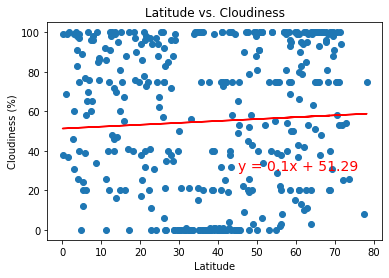

In [24]:
# Plot the linear regression of latitude and cloudiness in the northern hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='Latitude vs. Cloudiness')

# Linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Cloudiness (%)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Cloudiness (%)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the northern hemisphere, the cloudiness tend to increase while the city is away from 0 degree latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0023791156424511004
The linear regression model is y = 0.14x + 53.04


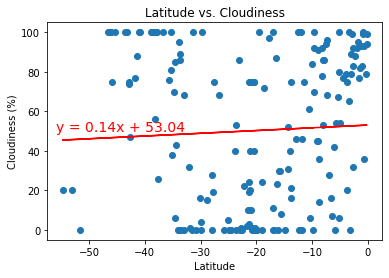

In [25]:
# Plot linear regression model between latitude and cloudiness in the southern hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='Latitude vs. Cloudiness')

# Linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Cloudiness (%)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Cloudiness (%)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-56,50),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the southern hemisphere, the cloudiness tend to increases while the city is close to 0 degree latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.0007506640010896663
The linear regression model is y = 0.0x + 3.52


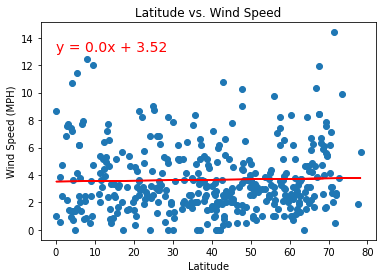

In [26]:
# Plot the linear regression of latitude and wind speed in the northern hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', title='Latitude vs. Wind Speed')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Wind Speed (MPH)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Wind Speed (MPH)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(0,13),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the northern hemisphere, the wind speed is not really affected while the city is away from 0 degree latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.0323254902559874
The linear regression model is y = -0.03x + 2.86


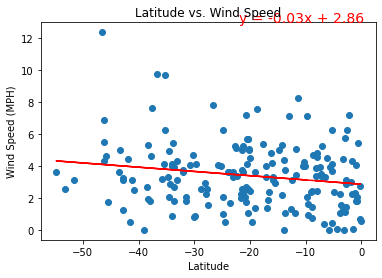

In [27]:
# Plot the linear regression of latitude and wind speed in the southern hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', title='Latitude vs. Wind Speed')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Wind Speed (MPH)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Wind Speed (MPH)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,13),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the southern hemisphere, the wind speed is not really affected(even have a slightly steeper slope) while the city is close to 0 degree latitude.